## FOUR WALLS AND A ROOF

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import math
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.simplefilter(action='ignore')

### PART 1 (DATA EXPLORATION)

#####  TASK 1

In [2]:
house_df=pd.read_csv('house_data.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#filtering the required columns from house_df
house_df1=house_df[['SalePrice','GrLivArea','LotArea','GarageArea','GarageCars','FullBath','YearBuilt','YrSold']]
house_df1.head()

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold
0,208500,1710,8450,548,2,2,2003,2008
1,181500,1262,9600,460,2,2,1976,2007
2,223500,1786,11250,608,2,2,2001,2008
3,140000,1717,9550,642,3,1,1915,2006
4,250000,2198,14260,836,3,2,2000,2008


##### TASK 2

In [4]:
#Creating new column 'AgeWhenSold'
house_df1['AgeWhenSold']=house_df1['YrSold']-house_df1['YearBuilt']
house_df1

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,2,2003,2008,5
1,181500,1262,9600,460,2,2,1976,2007,31
2,223500,1786,11250,608,2,2,2001,2008,7
3,140000,1717,9550,642,3,1,1915,2006,91
4,250000,2198,14260,836,3,2,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007,8
1456,210000,2073,13175,500,2,2,1978,2010,32
1457,266500,2340,9042,252,1,2,1941,2010,69
1458,142125,1078,9717,240,1,1,1950,2010,60


##### TASK 3

In [5]:
house_df2=house_df1[(house_df1.GrLivArea<=2600)&(house_df1.LotArea<=40000)]
house_df2

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,2,2003,2008,5
1,181500,1262,9600,460,2,2,1976,2007,31
2,223500,1786,11250,608,2,2,2001,2008,7
3,140000,1717,9550,642,3,1,1915,2006,91
4,250000,2198,14260,836,3,2,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007,8
1456,210000,2073,13175,500,2,2,1978,2010,32
1457,266500,2340,9042,252,1,2,1941,2010,69
1458,142125,1078,9717,240,1,1,1950,2010,60


In [6]:
house_df2.isnull().sum()

SalePrice      0
GrLivArea      0
LotArea        0
GarageArea     0
GarageCars     0
FullBath       0
YearBuilt      0
YrSold         0
AgeWhenSold    0
dtype: int64

### PART 2 (ONE DIMENSIONAL REGRESSION)

##### TASK 1

In [7]:
#Splitting the dataset into dependent and independent variables
X=house_df2[['GrLivArea']]
y=house_df2[['SalePrice']]
X.shape,y.shape

((1396, 1), (1396, 1))

In [8]:
#Dividing datset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1116, 1), (1116, 1), (280, 1), (280, 1))

##### TASK 2

In [9]:
#fitting linear regression into the training set
TheModel = LinearRegression()
TheModel.fit(X_train, y_train)

LinearRegression()

In [10]:
#Predicting the test and train set 
ThePrediction = TheModel.predict(X_test)
Prediction=TheModel.predict(X_train)

#Accuracy of test and train data
print ('Score(R square) of the test data is:',round(TheModel.score(X_test,y_test)*100,2),'%')
print ('Score(R square) of the train data is:',round(TheModel.score(X_train,y_train)*100,2),'%')

Score(R square) of the test data is: 40.07 %
Score(R square) of the train data is: 47.51 %


##### TASK 3

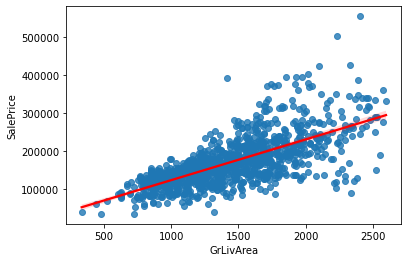

In [11]:
#Plotting the training data
sns.regplot(X_train,y_train, line_kws={"color": "red"})
plt.show()

In [12]:
C=house_df2.corr()
print('Correlation between Saleprice and LivingArea is',C['SalePrice'][1])

Correlation between Saleprice and LivingArea is 0.6774661088227774


#### TASK 4

In [13]:
#Predicted SalesPrice value
print ('Prediction Value of DEPENDENT-TRAIN DATA:\n',Prediction)
print ('Prediction Value of DEPENDENT-TEST DATA:\n',ThePrediction)


Prediction Value of DEPENDENT-TRAIN DATA:
 [[108119.36023417]
 [111116.22556732]
 [183469.11718185]
 ...
 [267595.40831945]
 [137231.76632759]
 [182933.96265807]]
Prediction Value of DEPENDENT-TEST DATA:
 [[226281.47908393]
 [157888.73094535]
 [284720.35308028]
 [150824.69123151]
 [114434.18361473]
 [195242.51670492]
 [205945.60718044]
 [ 84144.437569  ]
 [163133.24527836]
 [145152.05327948]
 [157353.57642157]
 [169341.03775416]
 [176619.13927751]
 [230990.83889316]
 [234094.73513106]
 [105015.46399627]
 [160564.50356423]
 [ 98914.70242522]
 [134448.96280396]
 [179401.94280115]
 [189676.90965765]
 [137017.70451808]
 [187215.19884828]
 [133592.71556592]
 [140656.75527976]
 [177903.51013458]
 [216755.72856072]
 [184111.30261038]
 [213223.7087038 ]
 [149005.16585067]
 [216327.6049417 ]
 [120320.88337627]
 [258925.90503428]
 [172551.96489681]
 [202948.7418473 ]
 [252182.9580347 ]
 [111116.22556732]
 [100627.19690131]
 [116788.86351935]
 [250363.43265386]
 [110367.00923403]
 [116895.8944241

In [14]:
#RMSE value for train and test set

print ('RMSE for TRAIN DATA:',math.sqrt(mean_squared_error(Prediction,y_train)))
print ('RMSE for TEST DATA:',math.sqrt(mean_squared_error(ThePrediction,y_test)))

RMSE for TRAIN DATA: 47166.77000874147
RMSE for TEST DATA: 60789.864216034206


##### TASK 5

In [15]:
#Dividing datset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1116, 1), (1116, 1), (280, 1), (280, 1))

In [16]:
#Predicting the test set results
ThePrediction = TheModel.predict(X_test)
Prediction=TheModel.predict(X_train)

#Accuracy of test and train data
print ('Score(R square) of the test data is:',round(TheModel.score(X_test,y_test)*100,2),'%')
print ('Score(R square) of the train data is:',round(TheModel.score(X_train,y_train)*100,2),'%')

Score(R square) of the test data is: 47.37 %
Score(R square) of the train data is: 45.5 %


In [17]:
#Predicted SalesPrice value
print ('Prediction Value of DEPENDENT-TRAIN DATA:\n',Prediction)
print ('Prediction Value of DEPENDENT-TEST DATA:\n',ThePrediction)

Prediction Value of DEPENDENT-TRAIN DATA:
 [[145152.05327948]
 [130488.81932801]
 [279154.74603301]
 ...
 [138195.04447039]
 [120320.88337627]
 [164631.67794493]]
Prediction Value of DEPENDENT-TEST DATA:
 [[163989.4925164 ]
 [182291.77722954]
 [109189.66928173]
 [177368.3556108 ]
 [176619.13927751]
 [140656.75527976]
 [189462.84784814]
 [134663.02461347]
 [199630.78379988]
 [176619.13927751]
 [101269.38232984]
 [165380.89427821]
 [150075.47489822]
 [211297.1524182 ]
 [223498.6755603 ]
 [156283.26737402]
 [159708.25632619]
 [113470.90547193]
 [195028.45489541]
 [228636.15898855]
 [112400.59642438]
 [146329.39323179]
 [218575.25394156]
 [198025.32022856]
 [186680.0443245 ]
 [129311.47937571]
 [244904.85651134]
 [178331.6337536 ]
 [158852.00908815]
 [ 93777.21899697]
 [176833.20108702]
 [193958.14584786]
 [152002.03118381]
 [258925.90503428]
 [123638.84142368]
 [166023.07970675]
 [200594.06194268]
 [142262.21885109]
 [125886.49042354]
 [133592.71556592]
 [199737.81470464]
 [214294.0177513

In [18]:
#RMSE value for train and test set

print ('RMSE for TRAIN DATA:',math.sqrt(mean_squared_error(Prediction,y_train)))
print ('RMSE for TEST DATA:',math.sqrt(mean_squared_error(ThePrediction,y_test)))

RMSE for TRAIN DATA: 50826.16576482689
RMSE for TEST DATA: 47604.103215801275


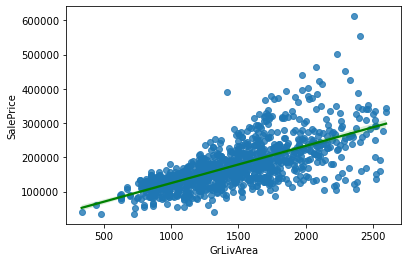

In [19]:
#Plotting the training data
sns.regplot(X_train,y_train, line_kws={"color": "green"})
plt.show()

In [20]:
print('The model is UNDER-FITTING')

The model is UNDER-FITTING


### PART 3 (MULTI DIMENSIONAL REGRESSION)

##### TASK 1

In [21]:
#Splitting the dataset into dependent and independent variables
X=house_df2[['GrLivArea','LotArea','GarageArea','AgeWhenSold']]
y=house_df2[['SalePrice']]
X.shape,y.shape

((1396, 4), (1396, 1))

In [22]:
#Dividing datset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1116, 4), (1116, 1), (280, 4), (280, 1))

In [23]:
#fitting linear regression into the training set

TheModel1 = LinearRegression()
TheModel1.fit(X_train, y_train)

LinearRegression()

##### TASK 2

In [24]:
#Predicting the test set results

ThePrediction = TheModel1.predict(X_test)
print ('Score(R square) of the test data is:',round(TheModel1.score(X_test,y_test)*100,2),'%')
print ('Score(R square) of the train data is:',round(TheModel1.score(X_train,y_train)*100,2),'%')
#print ('Prediction Value of TEST DEPENDENT:\n',ThePrediction)

Score(R square) of the test data is: 66.41 %
Score(R square) of the train data is: 71.76 %


The Prediction is improved while comparing the previous one-dimensional regression

##### TASK 3

In [25]:
#GrLivArea=400  LotArea=2000 GarageArea=80 AgeWhenSold=40
L=[400,2000,80,40]
df=pd.DataFrame(L,index=['GrLivArea','LotArea','GarageArea','AgeWhenSold'])
df=df.T
df

,GrLivArea,LotArea,GarageArea,AgeWhenSold
0,400,2000,80,40


In [26]:
#Predicting the price from trained model
ThePrediction = TheModel1.predict(df)

print ('REASONABLE PRICE=',ThePrediction[0])

REASONABLE PRICE= [54932.53466696]


In [27]:
#Extracting data in 20% range
#Living area-400
in_range=X[(X.GrLivArea>=360)&(X.GrLivArea<=440)]
in_range

,GrLivArea,LotArea,GarageArea,AgeWhenSold
1100,438,8400,246,89


In [28]:
#Lot area-2000
in_range1=X[((X.LotArea>=1800)&(X.LotArea<=2200))]
in_range1

,GrLivArea,LotArea,GarageArea,AgeWhenSold
180,1525,2117,440,7
227,987,1869,280,38
432,1365,1920,440,36
434,630,1890,0,36
500,1218,1890,264,34
599,1556,1950,452,28
623,1512,2117,440,7
649,630,1936,0,37
915,1092,2001,286,37
1086,1092,1974,286,37


In [29]:
#Garage area-80
in_range2=X[(X.GarageArea>=72)&(X.GarageArea<=88)]
in_range2

,GrLivArea,LotArea,GarageArea,AgeWhenSold


In [30]:
#AgeWhenSold-40
in_range3=X[(X.AgeWhenSold>=36)&(X.AgeWhenSold<=44)]
in_range3

,GrLivArea,LotArea,GarageArea,AgeWhenSold
7,2090,10382,484,36
10,1040,11200,384,43
16,1004,11241,480,40
17,1296,10791,516,39
24,1060,8246,270,42
...,...,...,...,...
1423,2201,19690,432,40
1436,864,9000,528,36
1445,913,8400,240,41
1449,630,1533,0,36


### PART 4 (LOGISTIC REGRESSION)

##### TASK 1

In [31]:
house_df2

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,2,2003,2008,5
1,181500,1262,9600,460,2,2,1976,2007,31
2,223500,1786,11250,608,2,2,2001,2008,7
3,140000,1717,9550,642,3,1,1915,2006,91
4,250000,2198,14260,836,3,2,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007,8
1456,210000,2073,13175,500,2,2,1978,2010,32
1457,266500,2340,9042,252,1,2,1941,2010,69
1458,142125,1078,9717,240,1,1,1950,2010,60


TARGET-FULLBATH  
FEATURE-GrLivArea

In [32]:
Z_O=house_df2[house_df2.FullBath<=1]
Z_O['FullBath']=0
two=house_df2[house_df2.FullBath>1]
two['FullBath']=1
DF=pd.concat([two, Z_O])
house_df2=DF
house_df2

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,1,2003,2008,5
1,181500,1262,9600,460,2,1,1976,2007,31
2,223500,1786,11250,608,2,1,2001,2008,7
4,250000,2198,14260,836,3,1,2000,2008,8
6,307000,1694,10084,636,2,1,2004,2007,3
...,...,...,...,...,...,...,...,...,...
1449,92000,630,1533,0,0,0,1970,2006,36
1452,145000,1072,3675,525,2,0,2005,2006,1
1453,84500,1140,17217,0,0,0,2006,2006,0
1458,142125,1078,9717,240,1,0,1950,2010,60


In [33]:
#Splitting the dataset into dependent and independent variables
X=house_df2[['GrLivArea']]
y=house_df2[['FullBath']]
X.shape,y.shape

((1396, 1), (1396, 1))

In [34]:
#Dividing datset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1116, 1), (1116, 1), (280, 1), (280, 1))

In [35]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)

#Calculating the accuracy of the training& testing dataset
print('R-Square value for TRAIN SET:',round(logreg.score(X_train, y_train) * 100, 2),'%')
print('R-Square value for TEST SET:',round(logreg.score(X_test, y_test) * 100, 2),'%')

R-Square value for TRAIN SET: 79.93 %
R-Square value for TEST SET: 79.64 %


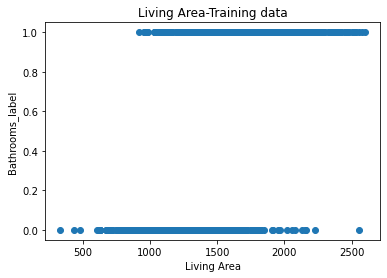

In [36]:
#Plotting the training data
plt.scatter(X_train,y_train)
plt.title('Living Area-Training data')
plt.xlabel('Living Area')
plt.ylabel('Bathrooms_label')
plt.show()

TARGET-FULLBATH  
FEATURE-GarageArea

In [37]:
#Splitting the dataset into dependent and independent variables
X=house_df2[['GarageArea']]
y=house_df2[['FullBath']]
X.shape,y.shape

((1396, 1), (1396, 1))

In [38]:
#Dividing datset into train and test set
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.20,random_state=2)
X1_train.shape,y1_train.shape,X1_test.shape,y1_test.shape

((1116, 1), (1116, 1), (280, 1), (280, 1))

In [39]:
# Logistic Regression - training the model
logreg1 = LogisticRegression()
logreg1.fit(X1_train, y1_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred1 = logreg1.predict(X1_test)
#Calculating the accuracy of the training& testing dataset
print('R-Square value for TRAIN SET:',round(logreg1.score(X1_train, y1_train) * 100, 2),'%')
print('R-Square value for TEST SET:',round(logreg1.score(X1_test, y1_test) * 100, 2),'%')

R-Square value for TRAIN SET: 71.77 %
R-Square value for TEST SET: 66.79 %


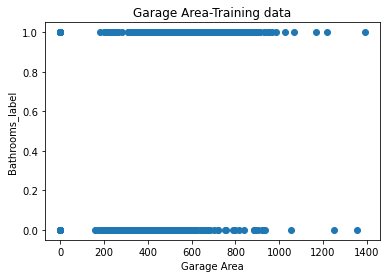

In [40]:
#Plotting the training data
plt.scatter(X1_train,y1_train)
plt.title('Garage Area-Training data')
plt.xlabel('Garage Area')
plt.ylabel('Bathrooms_label')
plt.show()

##### TASK 2

In [41]:
a=logreg.predict_proba(X_test)
a=a[:,1]
a=a*100
b=[]
ind=np.where(a>=90)
for i in ind:
    b.append(i)
b=b[0]

X=house_df2[['GrLivArea']]
print('These are the living areas,where there are more than 90% chance of having - more than 1 bathroom:\n')
print(X.iloc[b])

These are the living areas,where there are more than 90% chance of having - more than 1 bathroom:

     GrLivArea
2         1786
11        2324
25        1600
40        1324
50        1470
55        1425
56        1739
57        1720
69        2287
72        1718
84        1474
100       1610
101       1732
126        958
131       2054
147       2035
157       1968
159       2462
174       1651
183       2082
192       1431
211       1212
216       1436
221       2267
222       1552
240       1566
244       2110
266       1511
267       2192
278       2121
280       1982
282       1314
301       2452
302       1541
306       2243
316       2353
328       2134
334       1638
337       1536
347       1478
380       1691
381       1301
389       2332
409       2078
420       1344
426       1644
447       1886
476       1493
483       1216
497       1820
501       1768
505       1960
506       1911
515       2020
516       2119
517       2344
522       1664
530       1509
536       1724
5

In [42]:
#Predicting directly using living area
area=input('Enter Living Area :')
for i in area:
    a=logreg.predict_proba([[area]])*100
    a=a[:,1]
    a=a[0]
    print('The Probability of getting more than 1 bedroom for Living Area',area,'is',round(a,2),'%')
    break

Enter Living Area :2500
The Probability of getting more than 1 bedroom for Living Area 2500 is 99.56 %


##### TASK 3

In [43]:
#1)Living area
confusion_matrix(y_test,Y_pred)

array([[108,  36],
       [ 21, 115]], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.860


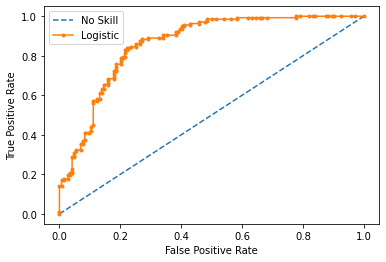

In [44]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [45]:
#2)Garage area
confusion_matrix(y1_test,Y_pred1)

array([[ 76,  68],
       [ 25, 111]], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.720


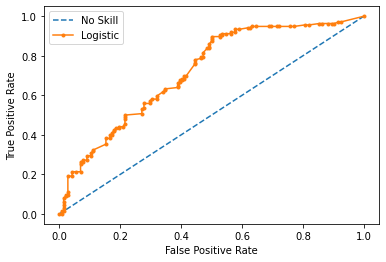

In [46]:
ns_probs = [0 for _ in range(len(y1_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y1_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y1_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [47]:
print('Living Area is better when compared with Garage Area')

Living Area is better when compared with Garage Area


### PART 5 (CART)

##### TASK 1

In [48]:
house_df2.head(2)

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,1,2003,2008,5
1,181500,1262,9600,460,2,1,1976,2007,31


In [49]:
house_df3=house_df2[house_df2.GarageArea!=0]
print('Before removal:',house_df2.shape)
print('After removal:',house_df3.shape)

Before removal: (1396, 9)
After removal: (1317, 9)


##### TASK 2

TARGET-GarageCars  

In [50]:
#SPLITTING DATASET INTO FEATURES AND TARGET
features=['LotArea','YearBuilt']
X=house_df3[features]
y=house_df3.GarageCars
X.shape,y.shape

((1317, 2), (1317,))

In [51]:
#A)SPLITTING DATASET INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((921, 2), (396, 2), (921,), (396,))

In [52]:
#B)CREATE DECISION TREE CLASSIFIER OBJECT(DTC)
clf = DecisionTreeClassifier(max_depth=3)

# FIT DTC
clf.fit(X_train,y_train)

#PREDICTING RESPONSE FOR TEST SET
y_pred= clf.predict(X_test)

#C) ACCURACY FOR TEST AND TRAIN DATASET
print("Accuracy for TEST DATASET:",round(clf.score(X_test,y_test)*100,2),'%')
print("Accuracy for TRAIN DATASET:",round(clf.score(X_train,y_train)*100,2),'%')

Accuracy for TEST DATASET: 69.44 %
Accuracy for TRAIN DATASET: 73.83 %


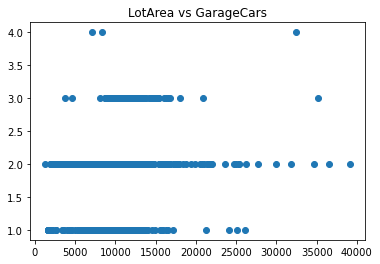

In [53]:
#Visualizing Train data
plt.scatter(X_train.iloc[:,0],y_train)
plt.title('LotArea vs GarageCars')
plt.show()

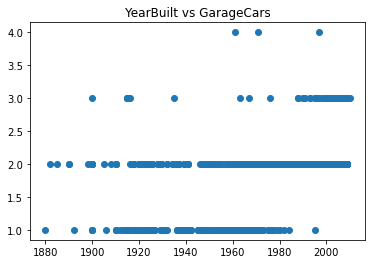

In [54]:
plt.scatter(X_train.iloc[:,1],y_train)
plt.title('YearBuilt vs GarageCars')
plt.show()

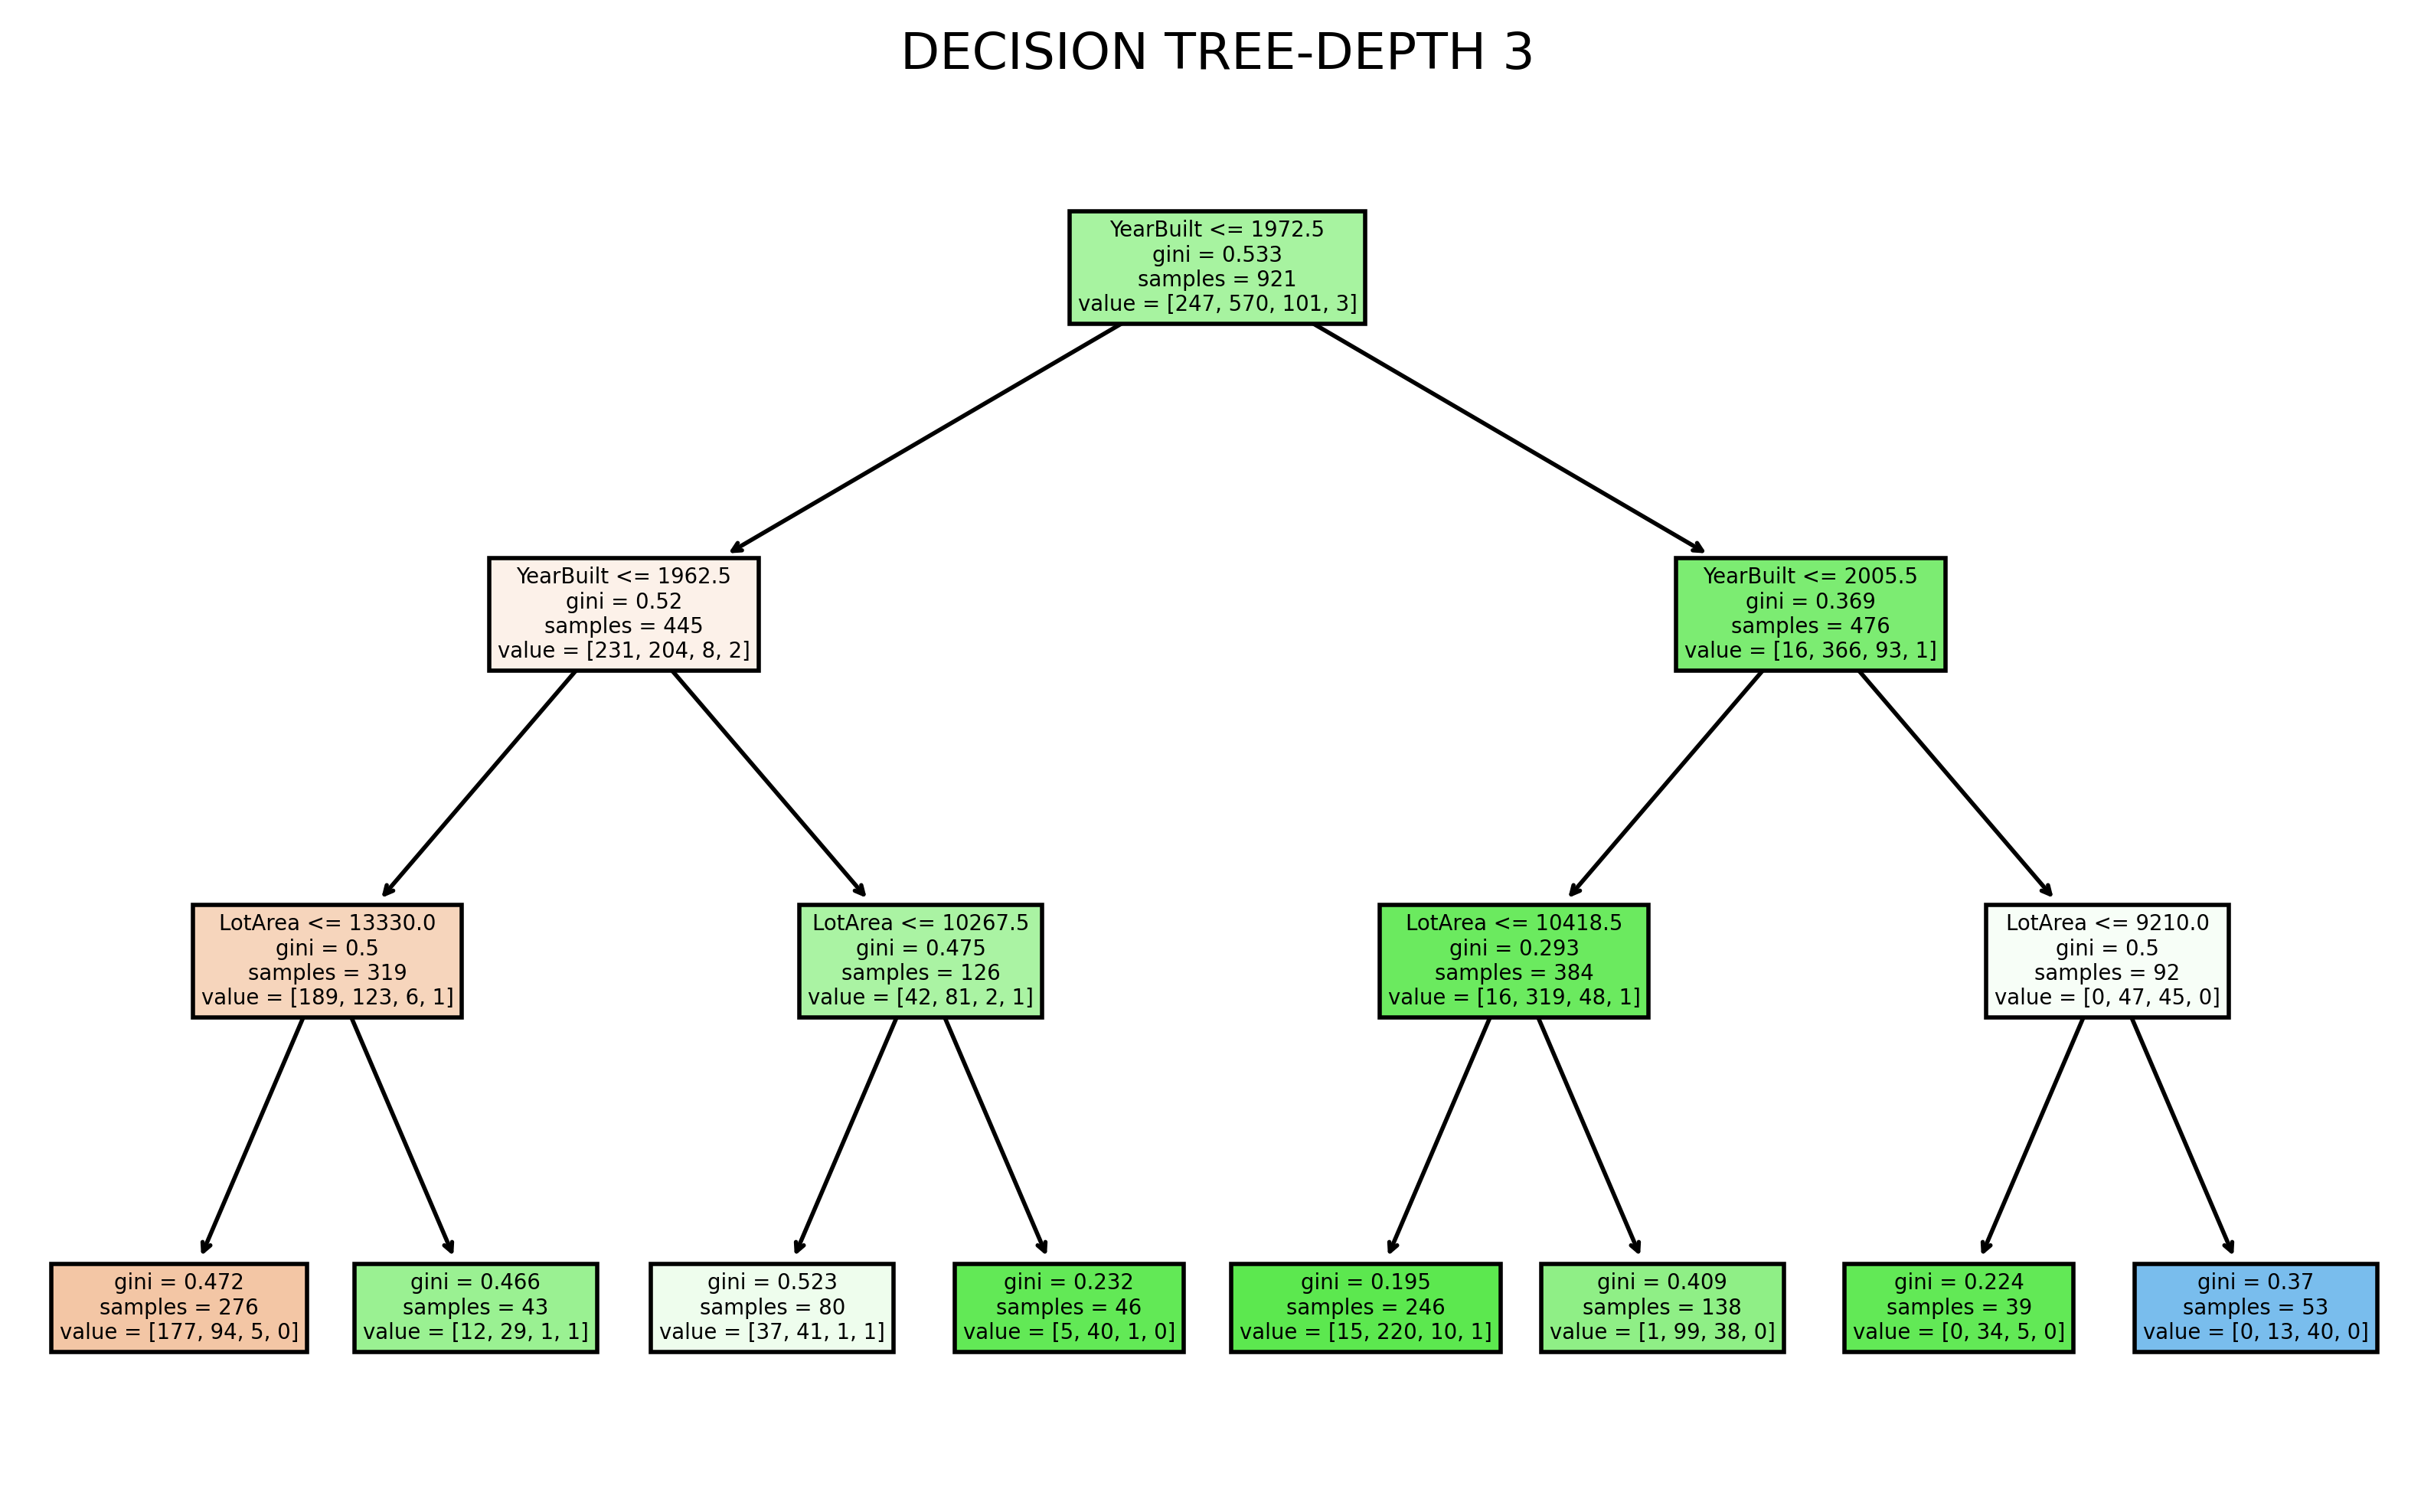

In [55]:
#TREE DIAGRAM
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=400)

tree.plot_tree(clf,
           feature_names = features, 
           filled = True);
plt.title('DECISION TREE-DEPTH 3')
plt.show()

##### TASK 3

In [56]:
#TREE DIAGRAM

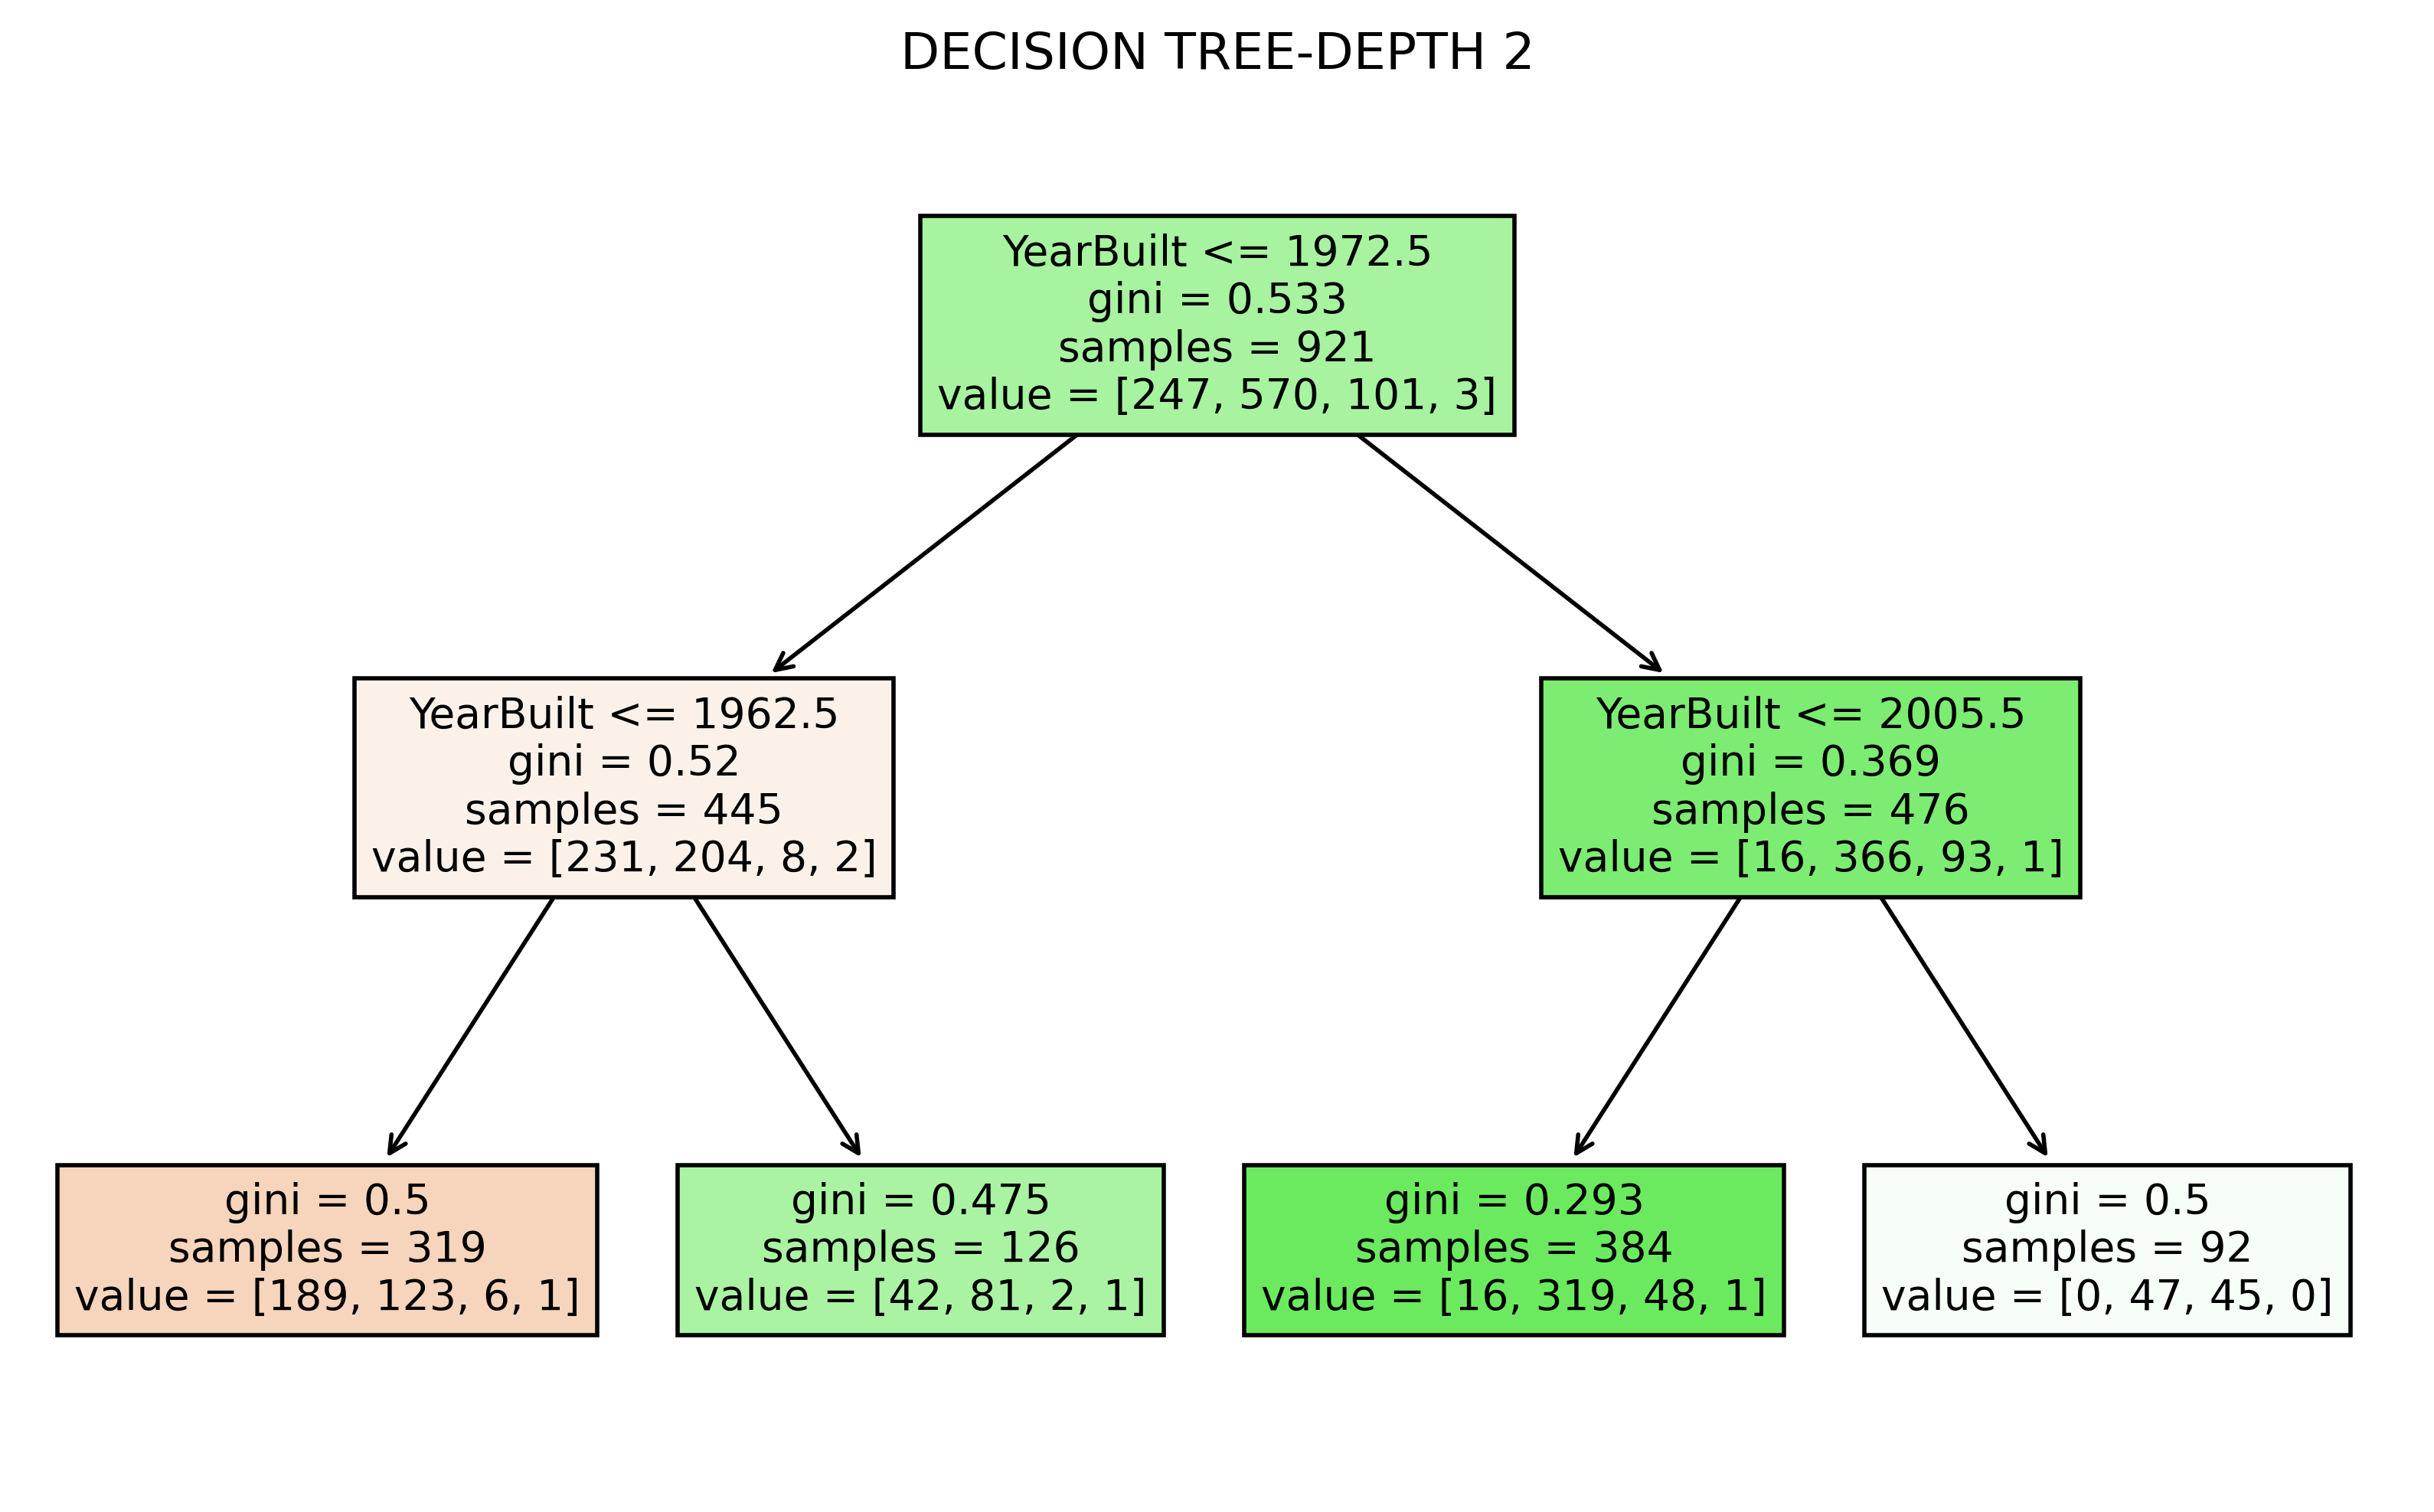

In [57]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=400)

tree.plot_tree(clf,
           feature_names = features, 
           filled = True);
plt.title('DECISION TREE-DEPTH 2')
plt.show()

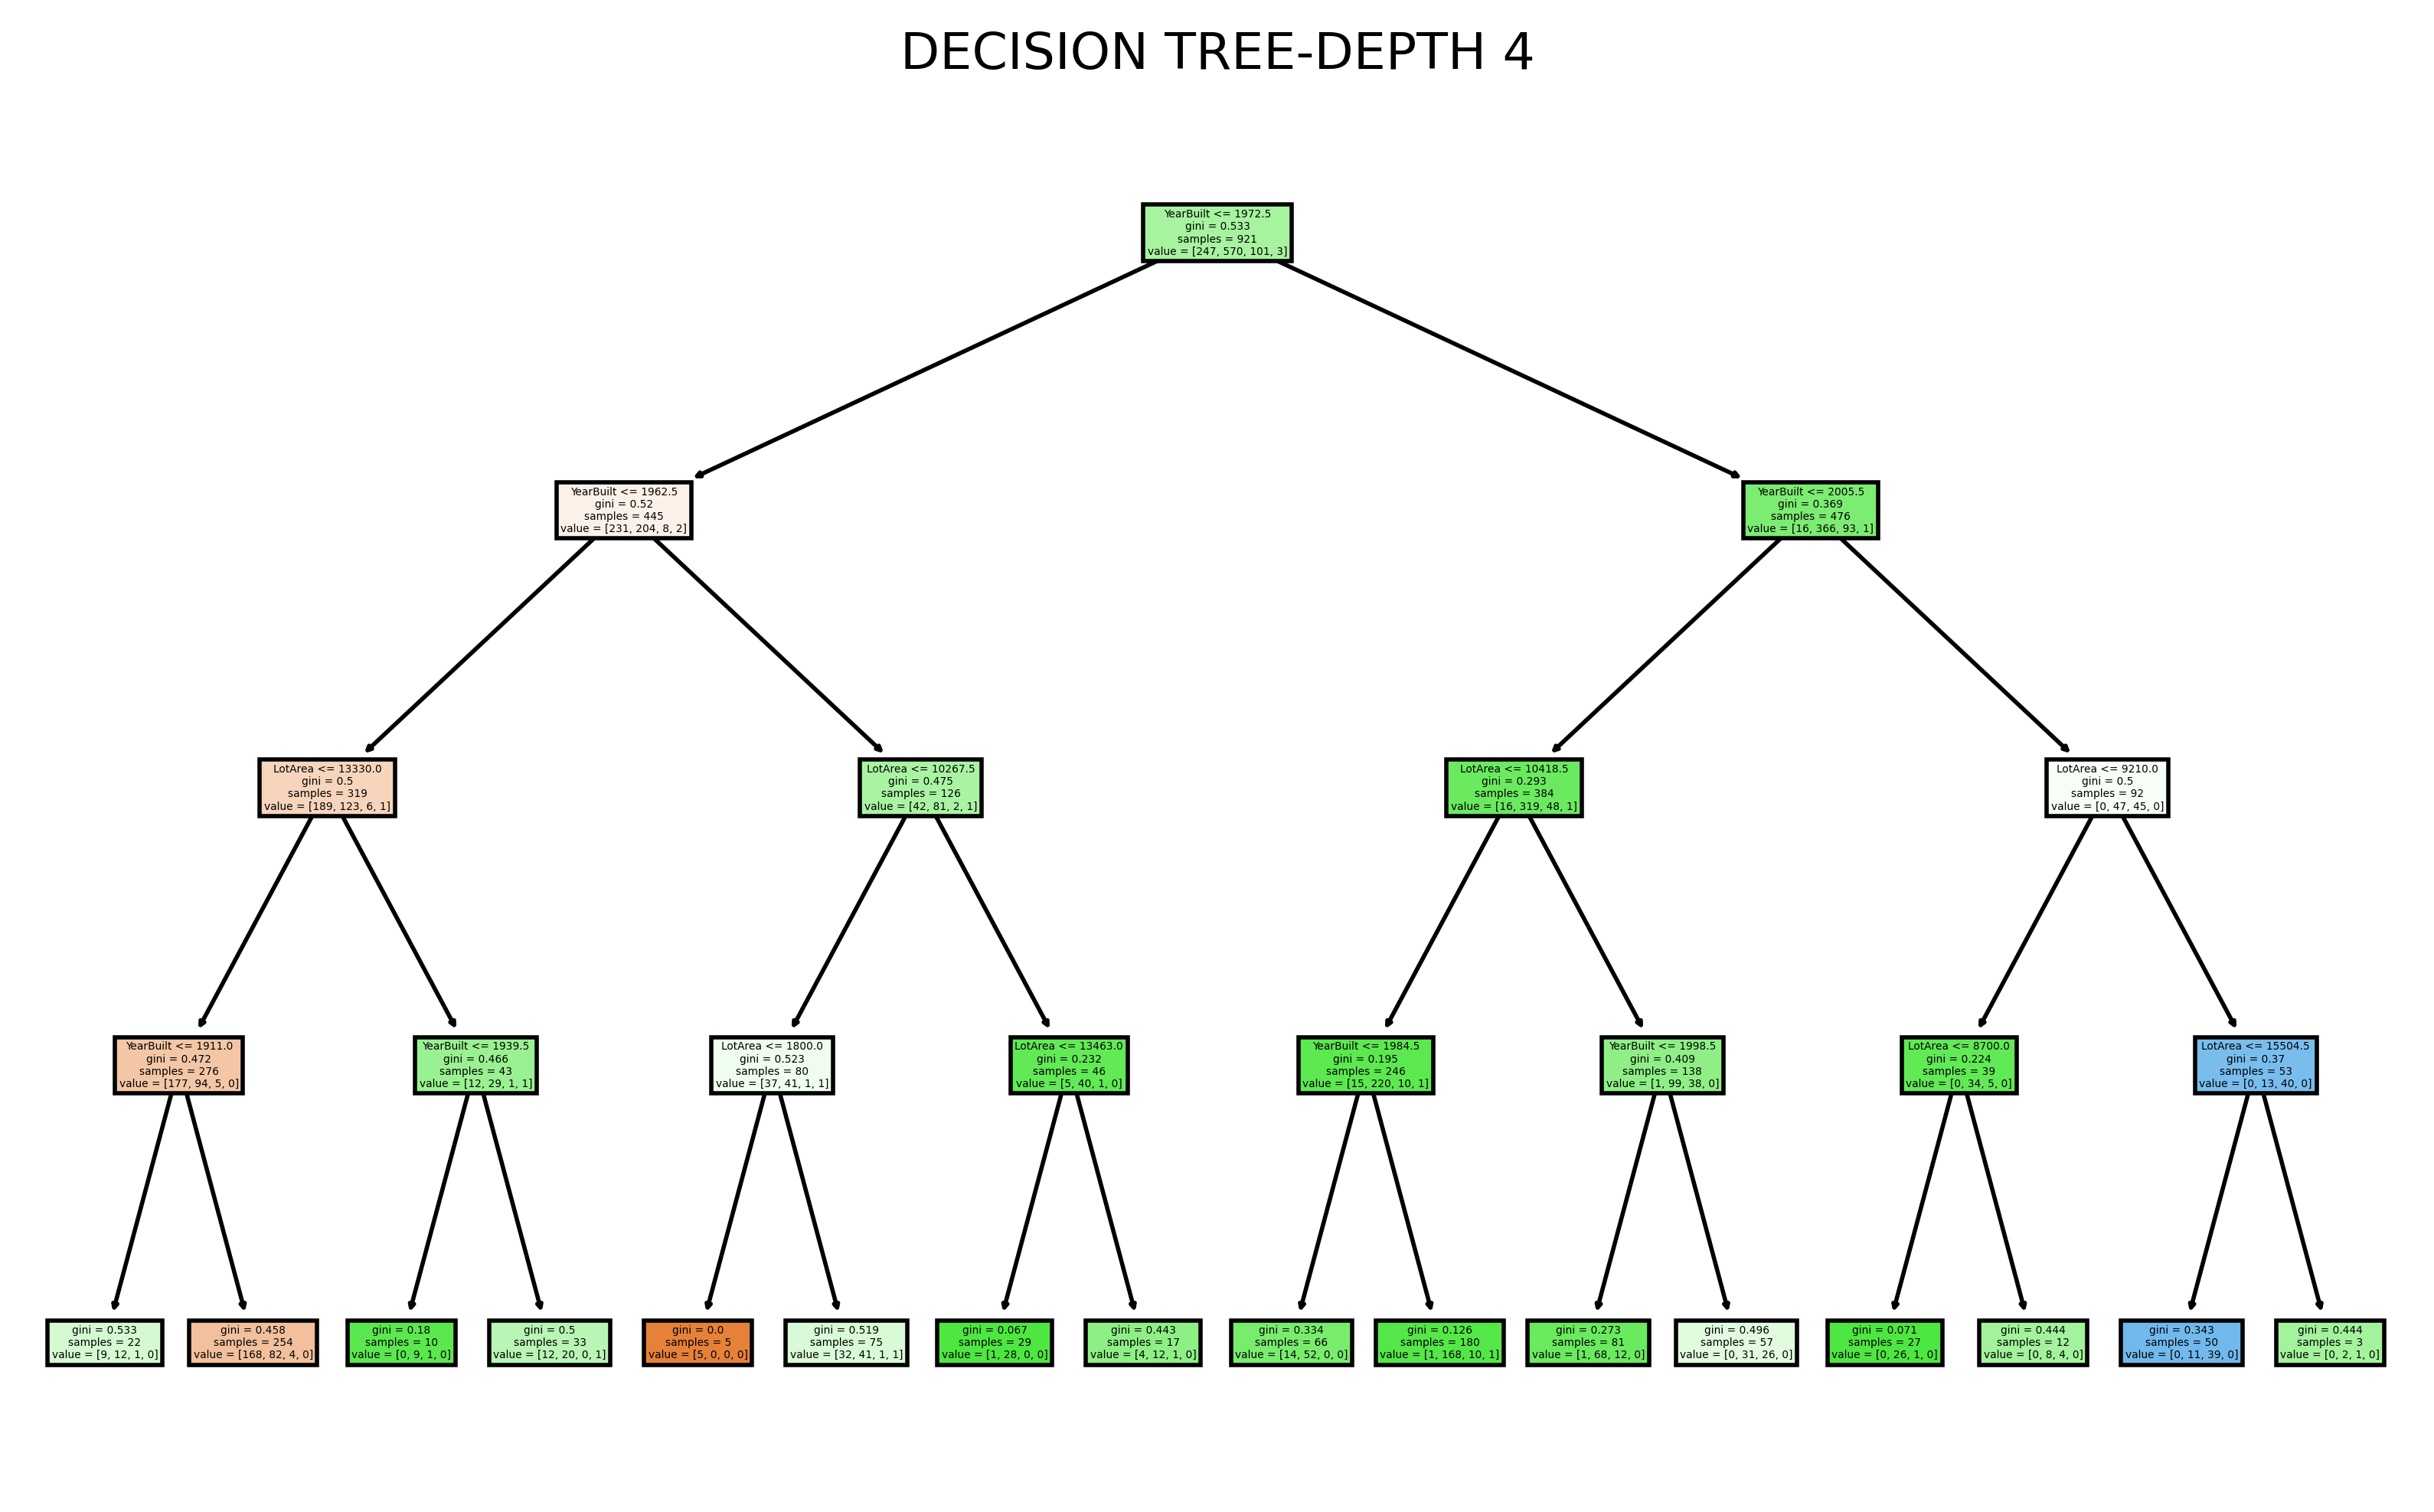

In [58]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=400)

tree.plot_tree(clf,
           feature_names = features, 
           filled = True);
plt.title('DECISION TREE-DEPTH 4')
plt.show()

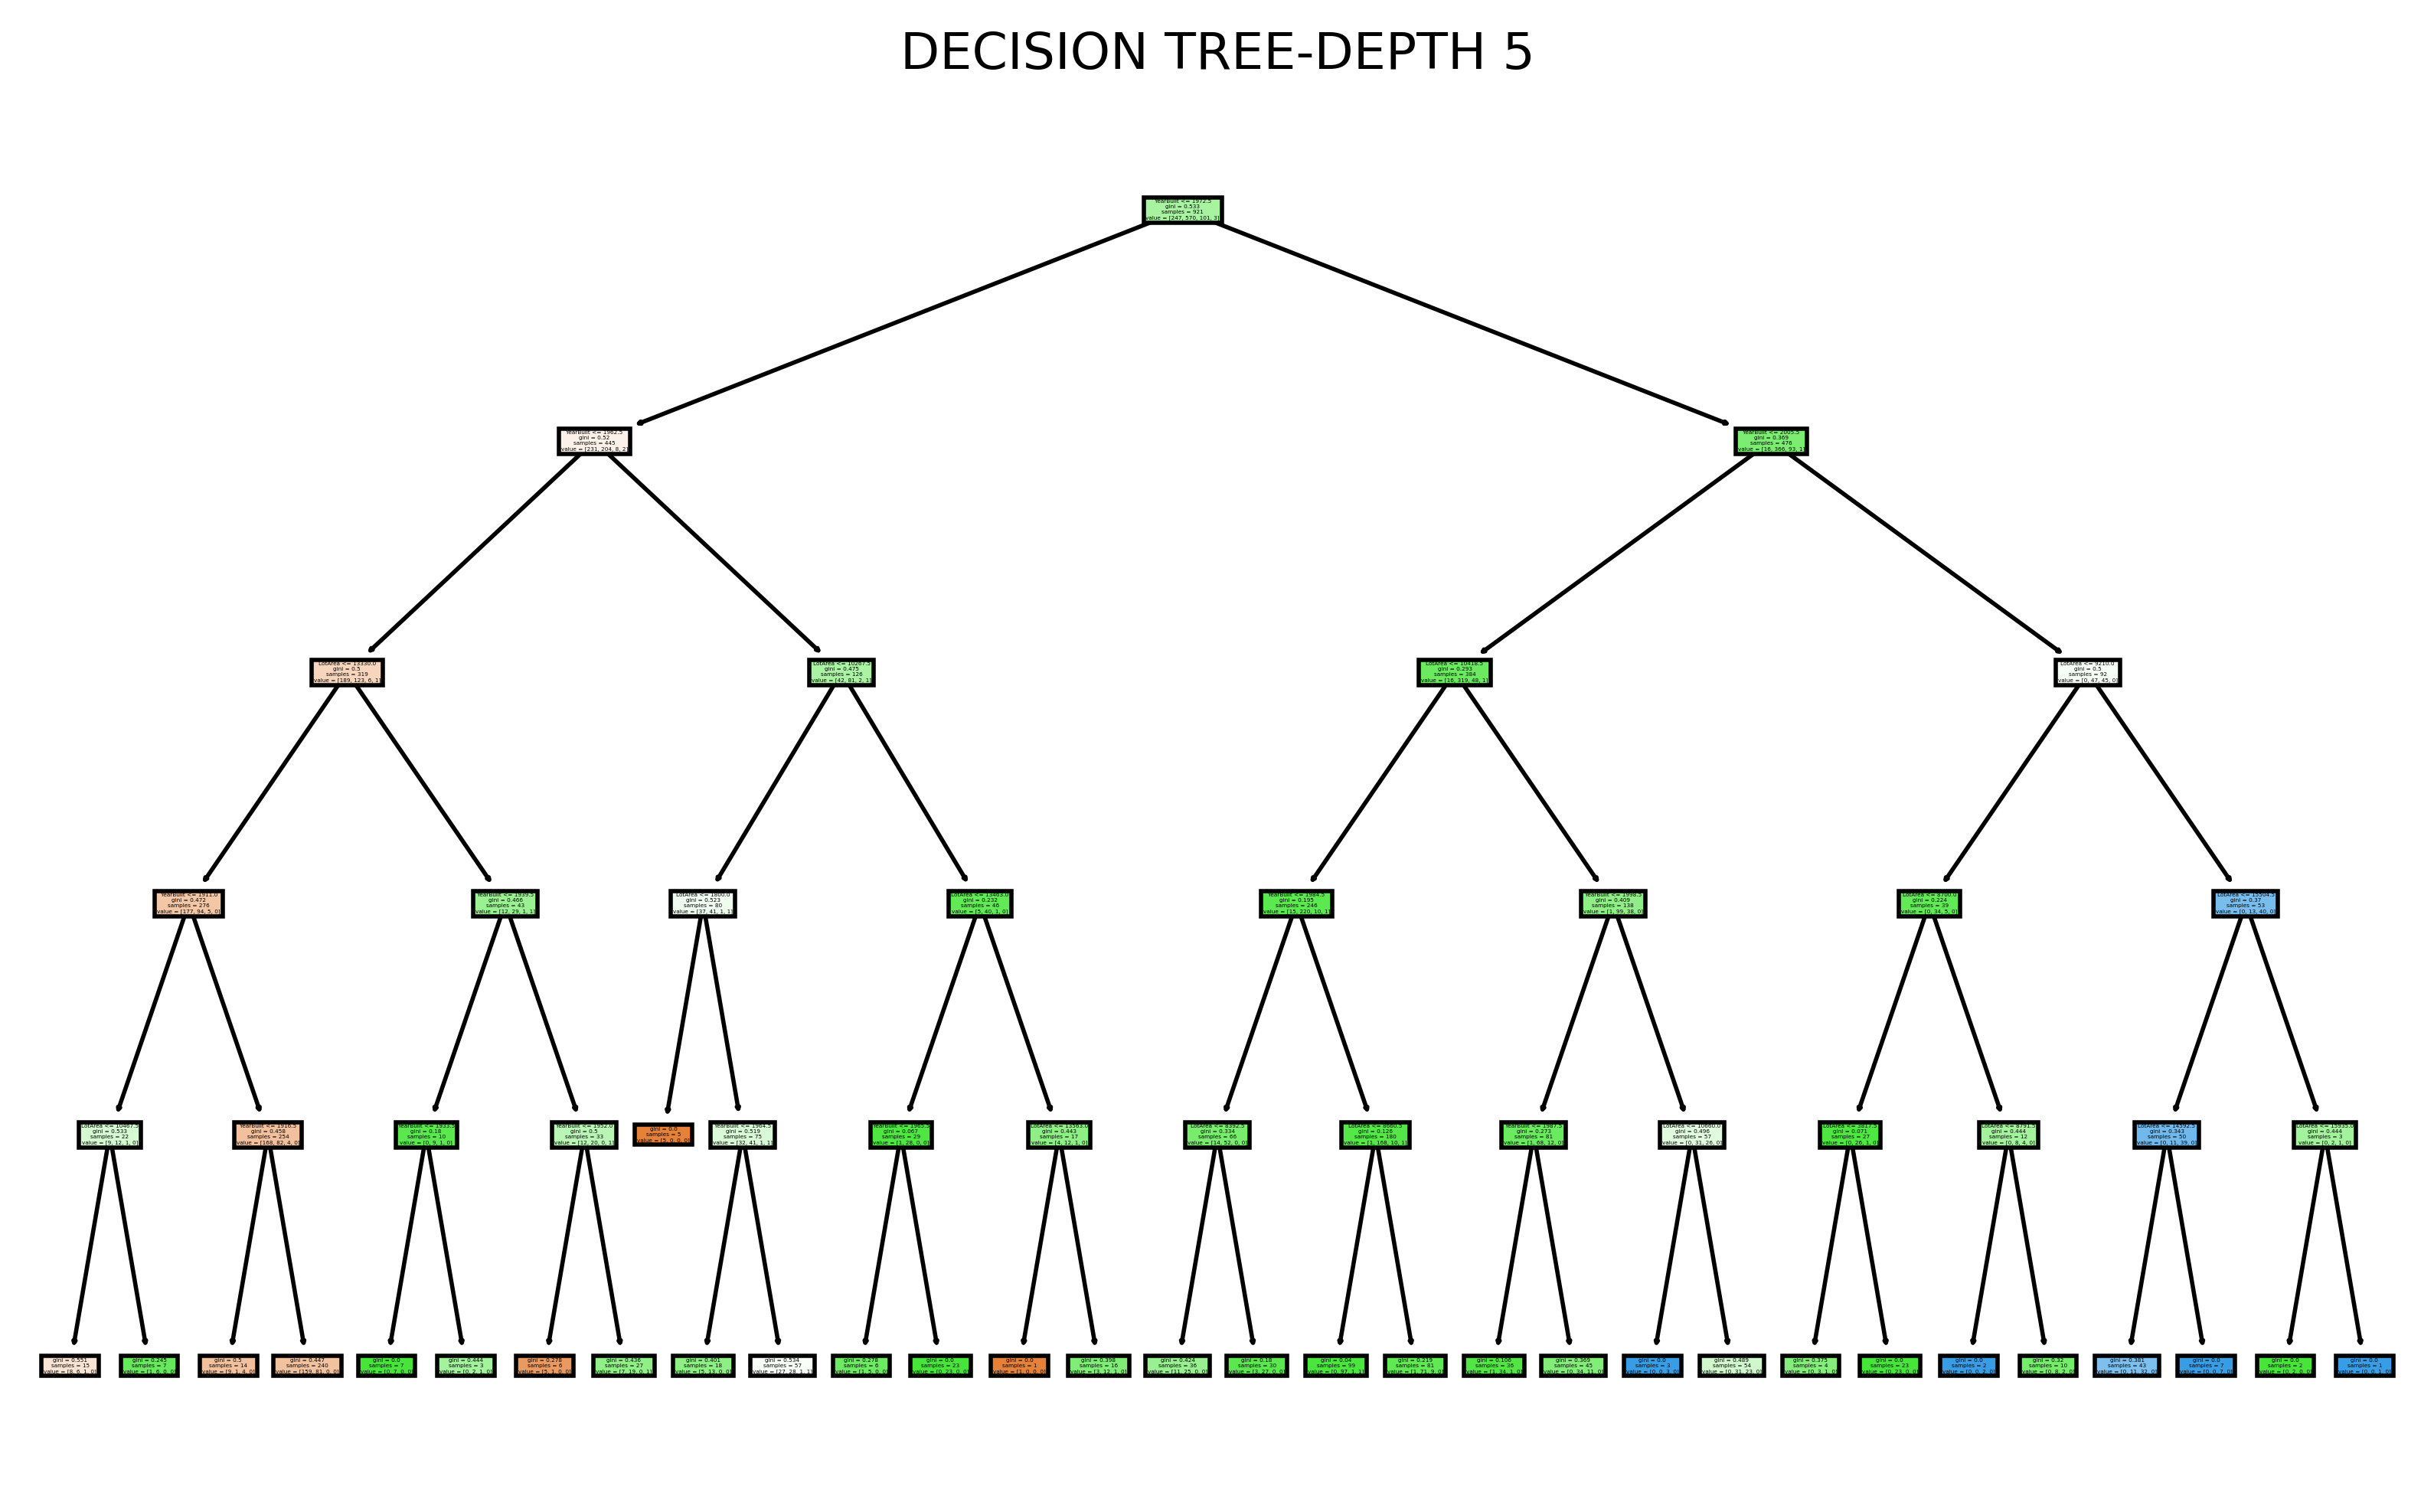

In [59]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=400)

tree.plot_tree(clf,
           feature_names = features, 
           filled = True);
plt.title('DECISION TREE-DEPTH 5')
plt.show()

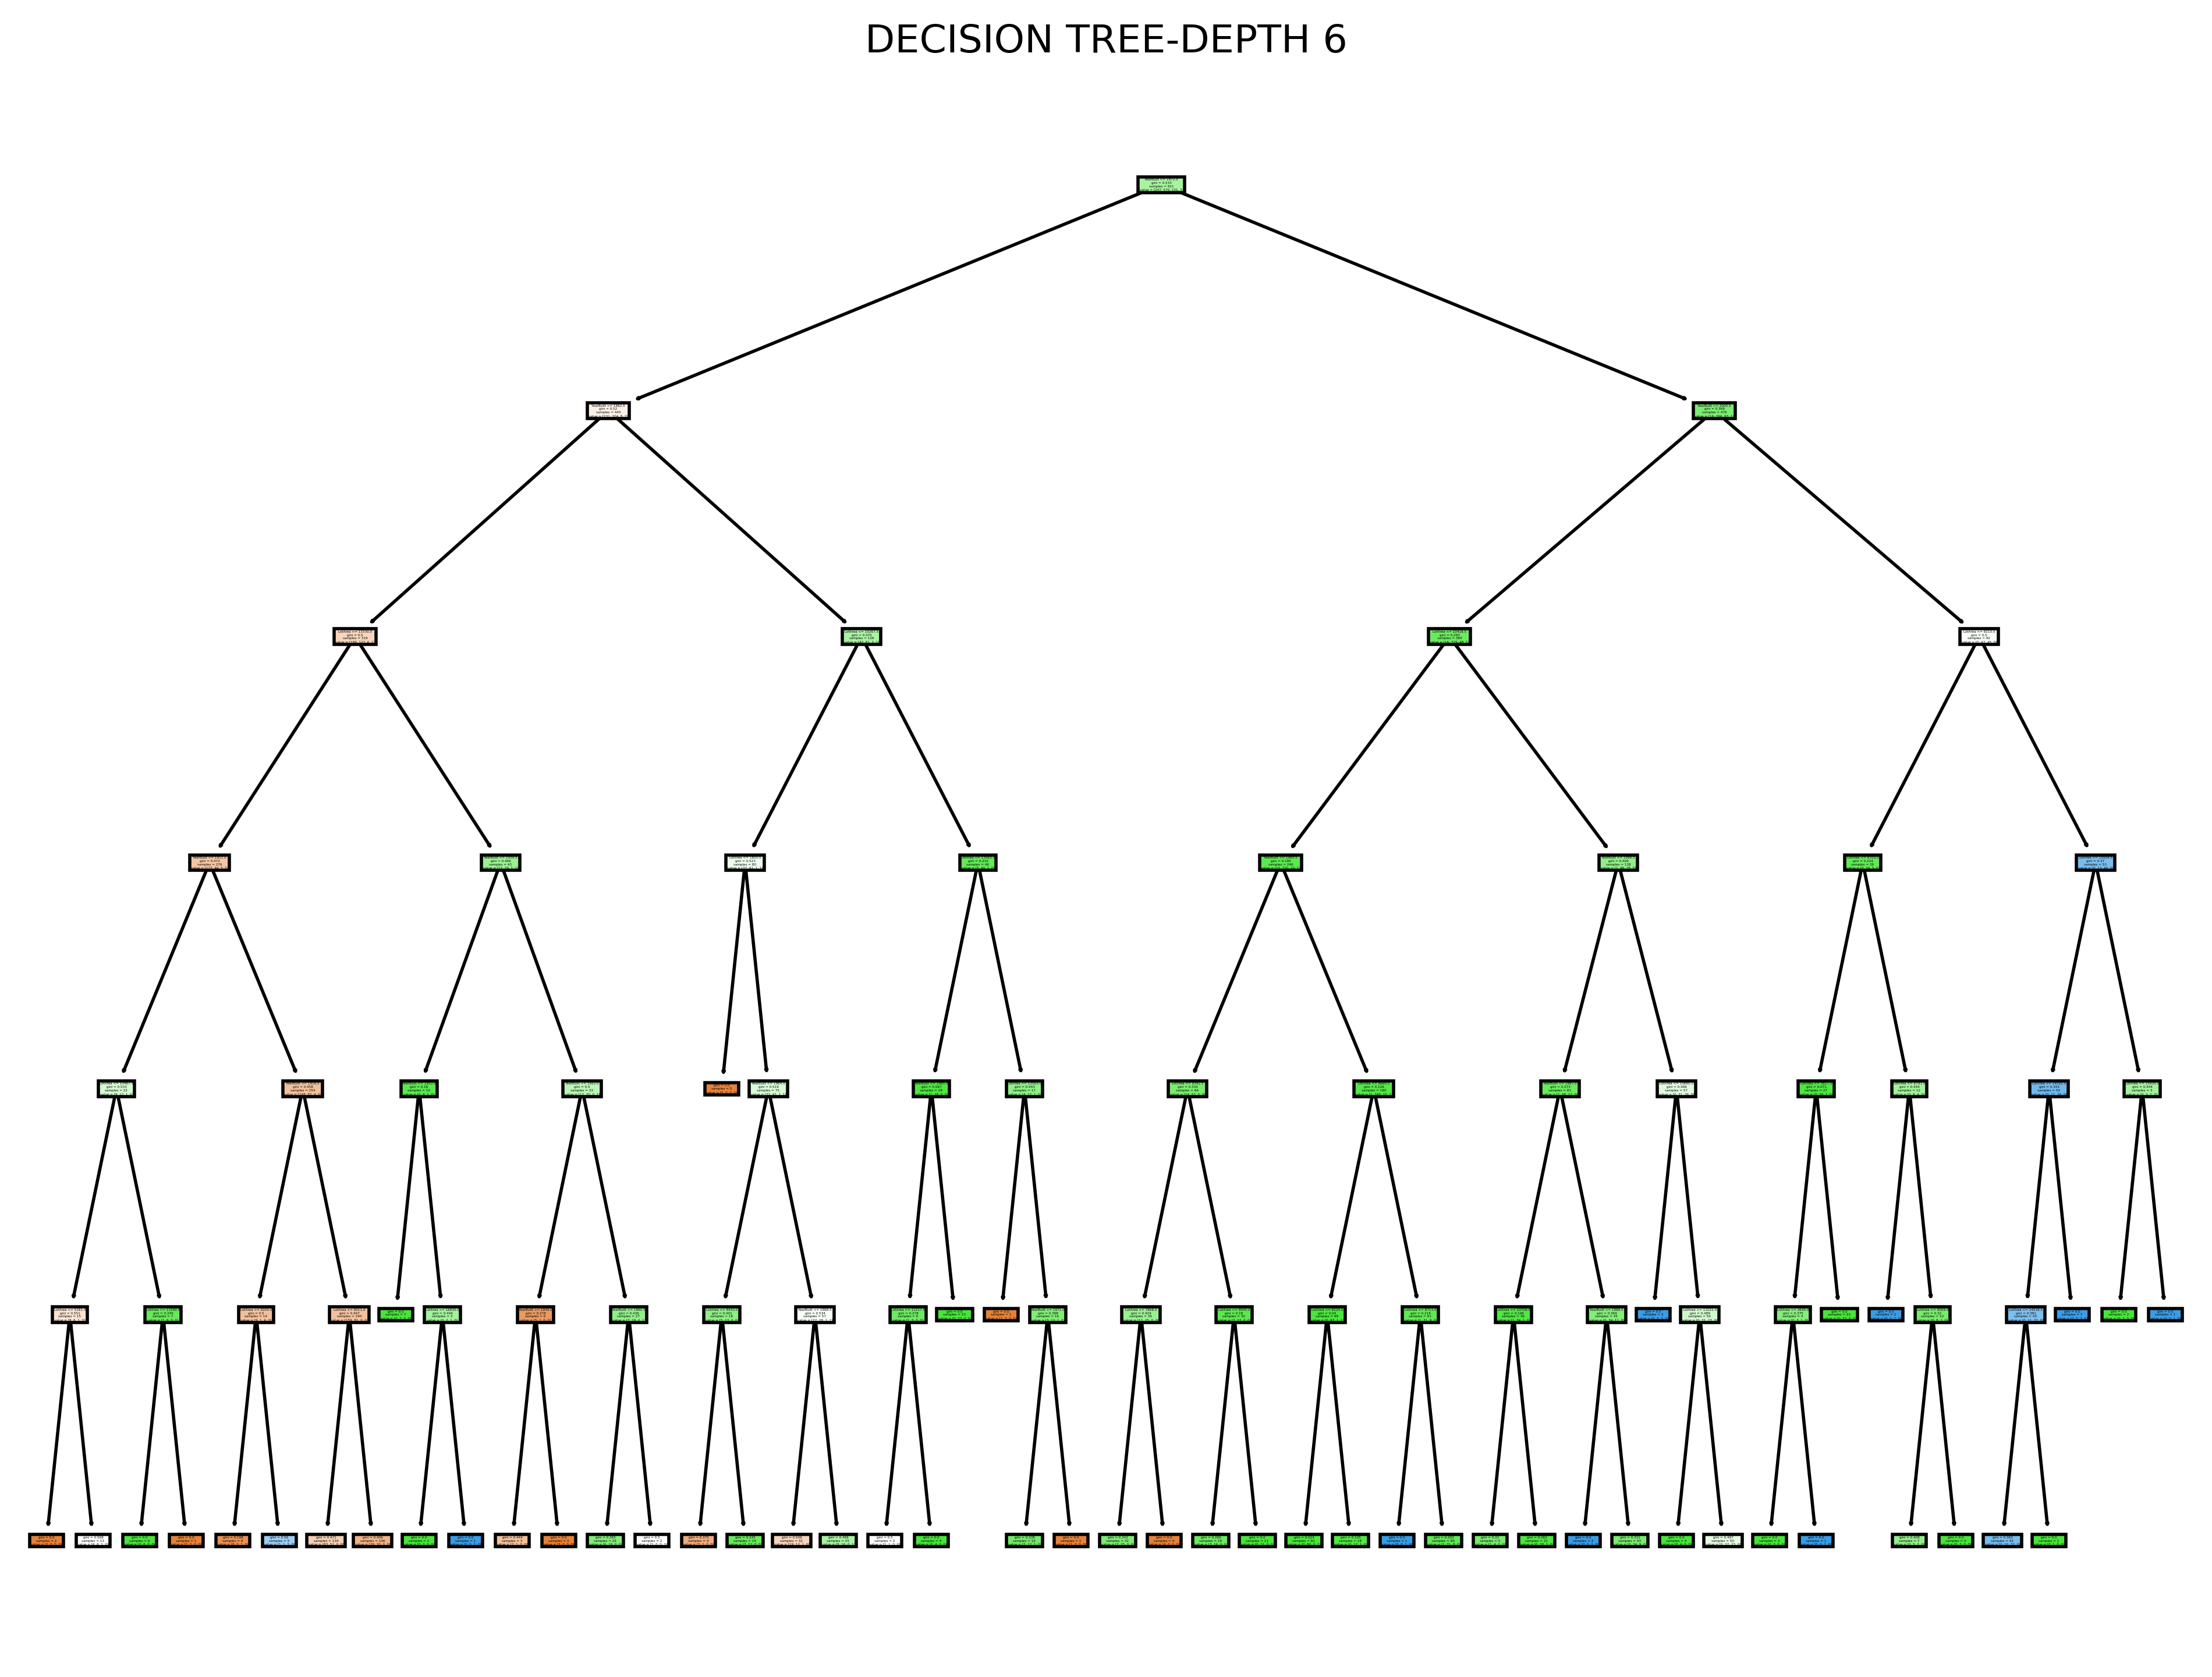

In [60]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,9), dpi=400)

tree.plot_tree(clf,
           feature_names = features, 
           filled = True);
plt.title('DECISION TREE-DEPTH 6')
plt.show()

Accuracy of Training set is directly proportional to the max_depth (i.e) If max_depth increases, then accuracy for training set will increase 

In [61]:
#END